# 1. Import Libraries

In [66]:
#Standard libraries
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt


# library for sampling
from scipy.stats import uniform


# libraries for Data Download
import datetime

from pandas_datareader import data as pdr

import fix_yahoo_finance as yf


# sklearn
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import linear_model

# 2. Data

## 2.1 Import Raw Data

In [2]:
start_sp = datetime.datetime(1900, 1, 1)
end_sp = datetime.datetime(2019, 2, 28)

yf.pdr_override() 
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_sp,
                             end_sp)
sp500.shape

[*********************100%***********************]  1 of 1 downloaded


(17400, 6)

## 2.2 Create Features

In [3]:
# Compute the logarithmic returns using the Closing price 
sp500['Log_Ret_1d'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# Compute logarithmic returns using the pandas rolling mean function
sp500['Log_Ret_1w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=5).sum()
sp500['Log_Ret_2w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=10).sum()
sp500['Log_Ret_3w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=15).sum()
sp500['Log_Ret_4w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=20).sum()
sp500['Log_Ret_8w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=40).sum()
sp500['Log_Ret_12w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=60).sum()
sp500['Log_Ret_16w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=80).sum()
sp500['Log_Ret_20w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=100).sum()
sp500['Log_Ret_24w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=120).sum()
sp500['Log_Ret_28w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=140).sum()
sp500['Log_Ret_32w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=160).sum()
sp500['Log_Ret_36w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=180).sum()
sp500['Log_Ret_40w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=200).sum()
sp500['Log_Ret_44w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=220).sum()
sp500['Log_Ret_48w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=240).sum()
sp500['Log_Ret_52w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=260).sum()
sp500['Log_Ret_56w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=280).sum()
sp500['Log_Ret_60w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=300).sum()
sp500['Log_Ret_64w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=320).sum()
sp500['Log_Ret_68w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=340).sum()
sp500['Log_Ret_72w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=360).sum()
sp500['Log_Ret_76w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=380).sum()
sp500['Log_Ret_80w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=400).sum()

# Compute Volatility using the pandas rolling standard deviation function
sp500['Vol_1w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=5).std()*np.sqrt(5)
sp500['Vol_2w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=10).std()*np.sqrt(10)
sp500['Vol_3w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=15).std()*np.sqrt(15)
sp500['Vol_4w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=20).std()*np.sqrt(20)
sp500['Vol_8w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=40).std()*np.sqrt(40)
sp500['Vol_12w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=60).std()*np.sqrt(60)
sp500['Vol_16w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=80).std()*np.sqrt(80)
sp500['Vol_20w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=100).std()*np.sqrt(100)
sp500['Vol_24w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=120).std()*np.sqrt(120)
sp500['Vol_28w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=140).std()*np.sqrt(140)
sp500['Vol_32w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=160).std()*np.sqrt(160)
sp500['Vol_36w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=180).std()*np.sqrt(180)
sp500['Vol_40w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=200).std()*np.sqrt(200)
sp500['Vol_44w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=220).std()*np.sqrt(220)
sp500['Vol_48w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=240).std()*np.sqrt(240)
sp500['Vol_52w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=260).std()*np.sqrt(260)
sp500['Vol_56w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=280).std()*np.sqrt(280)
sp500['Vol_60w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=300).std()*np.sqrt(300)
sp500['Vol_64w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=320).std()*np.sqrt(320)
sp500['Vol_68w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=340).std()*np.sqrt(340)
sp500['Vol_72w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=360).std()*np.sqrt(360)
sp500['Vol_76w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=380).std()*np.sqrt(380)
sp500['Vol_80w'] = pd.Series(sp500['Log_Ret_1d']).rolling(window=400).std()*np.sqrt(400)

# Compute Volumes using the pandas rolling mean function
sp500['Volume_1w'] = pd.Series(sp500['Volume']).rolling(window=5).mean()
sp500['Volume_2w'] = pd.Series(sp500['Volume']).rolling(window=10).mean()
sp500['Volume_3w'] = pd.Series(sp500['Volume']).rolling(window=15).mean()
sp500['Volume_4w'] = pd.Series(sp500['Volume']).rolling(window=20).mean()
sp500['Volume_8w'] = pd.Series(sp500['Volume']).rolling(window=40).mean()
sp500['Volume_12w'] = pd.Series(sp500['Volume']).rolling(window=60).mean()
sp500['Volume_16w'] = pd.Series(sp500['Volume']).rolling(window=80).mean()
sp500['Volume_20w'] = pd.Series(sp500['Volume']).rolling(window=100).mean()
sp500['Volume_24w'] = pd.Series(sp500['Volume']).rolling(window=120).mean()
sp500['Volume_28w'] = pd.Series(sp500['Volume']).rolling(window=140).mean()
sp500['Volume_32w'] = pd.Series(sp500['Volume']).rolling(window=160).mean()
sp500['Volume_36w'] = pd.Series(sp500['Volume']).rolling(window=180).mean()
sp500['Volume_40w'] = pd.Series(sp500['Volume']).rolling(window=200).mean()
sp500['Volume_44w'] = pd.Series(sp500['Volume']).rolling(window=220).mean()
sp500['Volume_48w'] = pd.Series(sp500['Volume']).rolling(window=240).mean()
sp500['Volume_52w'] = pd.Series(sp500['Volume']).rolling(window=260).mean()
sp500['Volume_56w'] = pd.Series(sp500['Volume']).rolling(window=280).mean()
sp500['Volume_60w'] = pd.Series(sp500['Volume']).rolling(window=300).mean()
sp500['Volume_64w'] = pd.Series(sp500['Volume']).rolling(window=320).mean()
sp500['Volume_68w'] = pd.Series(sp500['Volume']).rolling(window=340).mean()
sp500['Volume_72w'] = pd.Series(sp500['Volume']).rolling(window=360).mean()
sp500['Volume_76w'] = pd.Series(sp500['Volume']).rolling(window=380).mean()
sp500['Volume_80w'] = pd.Series(sp500['Volume']).rolling(window=400).mean()

# Label data: Up (Down) if the the 1 month (≈ 20 trading days) logarithmic return increased (decreased)
sp500['Return_Label'] = pd.Series(sp500['Log_Ret_1d']).shift(-21).rolling(window=21).sum()
sp500['Label'] = np.where(sp500['Return_Label'] > 0, 1, 0)

# Drop NA´s
sp500 = sp500.dropna("index")
sp500 = sp500.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', "Return_Label"], axis=1)

## 2.3 Extract Basic Information 

In [4]:
# Show rows and columns
print("Rows, Columns:");print(sp500.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(sp500.columns);print("\n")

# Show info on DataFrame
print("Info:");print(sp500.info()); print("\n")

# Count Non-NA values
print("Non-NA:");print(sp500.count()); print("\n")

# Show head
print("Head");print(sp500.head()); print("\n")

# Show tail
print("Tail");print(sp500.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(sp500.describe());print("\n")

Rows, Columns:
(16979, 71)


Columns:
Index(['Log_Ret_1d', 'Log_Ret_1w', 'Log_Ret_2w', 'Log_Ret_3w', 'Log_Ret_4w',
       'Log_Ret_8w', 'Log_Ret_12w', 'Log_Ret_16w', 'Log_Ret_20w',
       'Log_Ret_24w', 'Log_Ret_28w', 'Log_Ret_32w', 'Log_Ret_36w',
       'Log_Ret_40w', 'Log_Ret_44w', 'Log_Ret_48w', 'Log_Ret_52w',
       'Log_Ret_56w', 'Log_Ret_60w', 'Log_Ret_64w', 'Log_Ret_68w',
       'Log_Ret_72w', 'Log_Ret_76w', 'Log_Ret_80w', 'Vol_1w', 'Vol_2w',
       'Vol_3w', 'Vol_4w', 'Vol_8w', 'Vol_12w', 'Vol_16w', 'Vol_20w',
       'Vol_24w', 'Vol_28w', 'Vol_32w', 'Vol_36w', 'Vol_40w', 'Vol_44w',
       'Vol_48w', 'Vol_52w', 'Vol_56w', 'Vol_60w', 'Vol_64w', 'Vol_68w',
       'Vol_72w', 'Vol_76w', 'Vol_80w', 'Volume_1w', 'Volume_2w', 'Volume_3w',
       'Volume_4w', 'Volume_8w', 'Volume_12w', 'Volume_16w', 'Volume_20w',
       'Volume_24w', 'Volume_28w', 'Volume_32w', 'Volume_36w', 'Volume_40w',
       'Volume_44w', 'Volume_48w', 'Volume_52w', 'Volume_56w', 'Volume_60w',
       'Volume_64w', '

         Log_Ret_1d    Log_Ret_1w    Log_Ret_2w    Log_Ret_3w    Log_Ret_4w  \
count  16979.000000  16979.000000  16979.000000  16979.000000  16979.000000   
mean       0.000279      0.001399      0.002801      0.004204      0.005599   
std        0.009686      0.021548      0.029816      0.036296      0.041877   
min       -0.228997     -0.319214     -0.377868     -0.365360     -0.350374   
25%       -0.004041     -0.009985     -0.012766     -0.014165     -0.016404   
50%        0.000448      0.002765      0.005179      0.007217      0.009597   
75%        0.004923      0.013757      0.020176      0.025997      0.030966   
max        0.109572      0.174887      0.195882      0.199030      0.211030   

         Log_Ret_8w   Log_Ret_12w   Log_Ret_16w   Log_Ret_20w   Log_Ret_24w  \
count  16979.000000  16979.000000  16979.000000  16979.000000  16979.000000   
mean       0.011244      0.016946      0.022631      0.028405      0.034151   
std        0.059004      0.071810      0.083149    

## 2.4 Plot Data

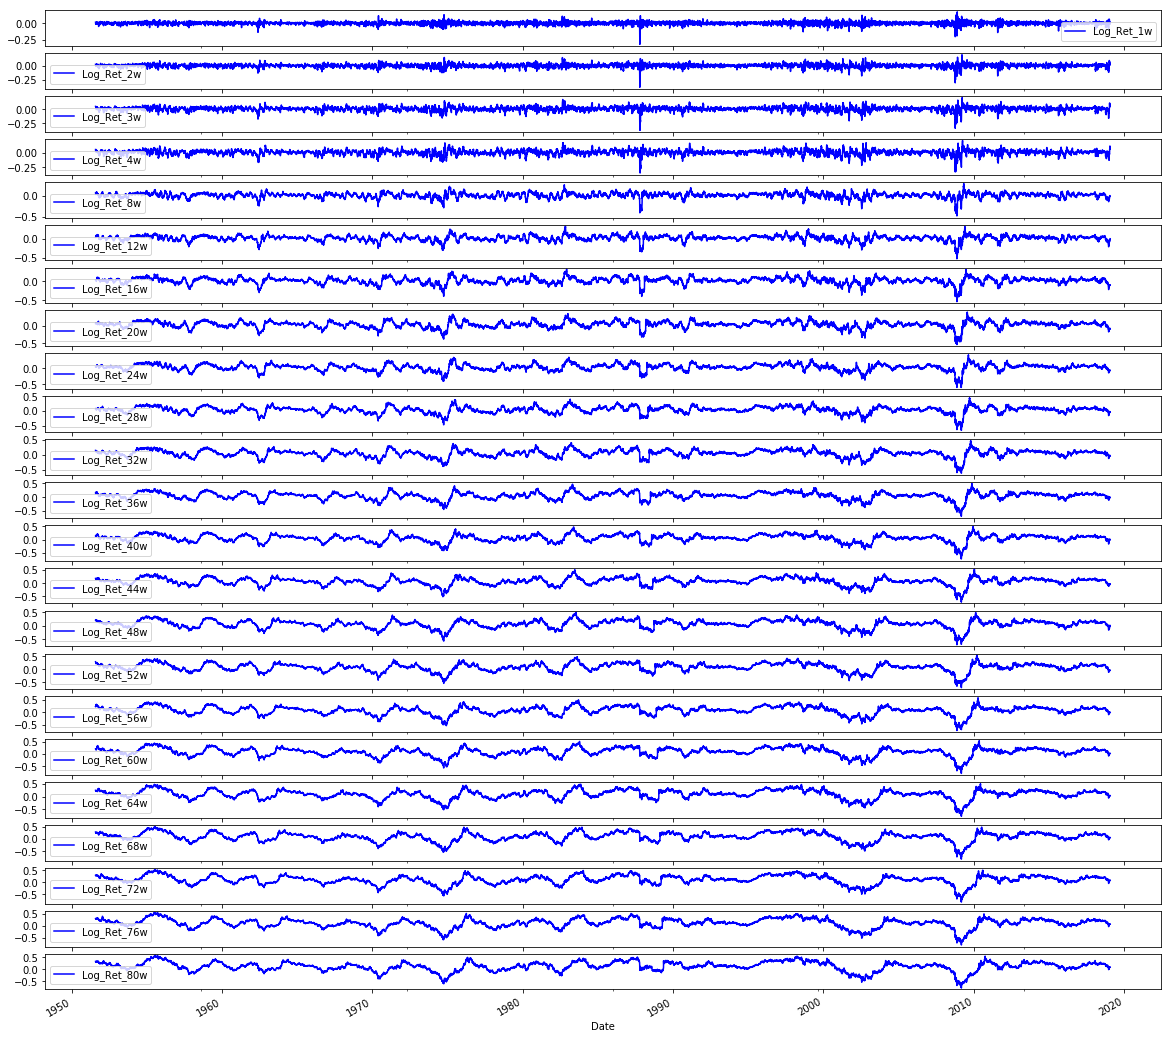

In [5]:
# Plot the logarithmic returns
sp500.iloc[:,1:24].plot(subplots=True, color='blue',figsize=(20, 20));

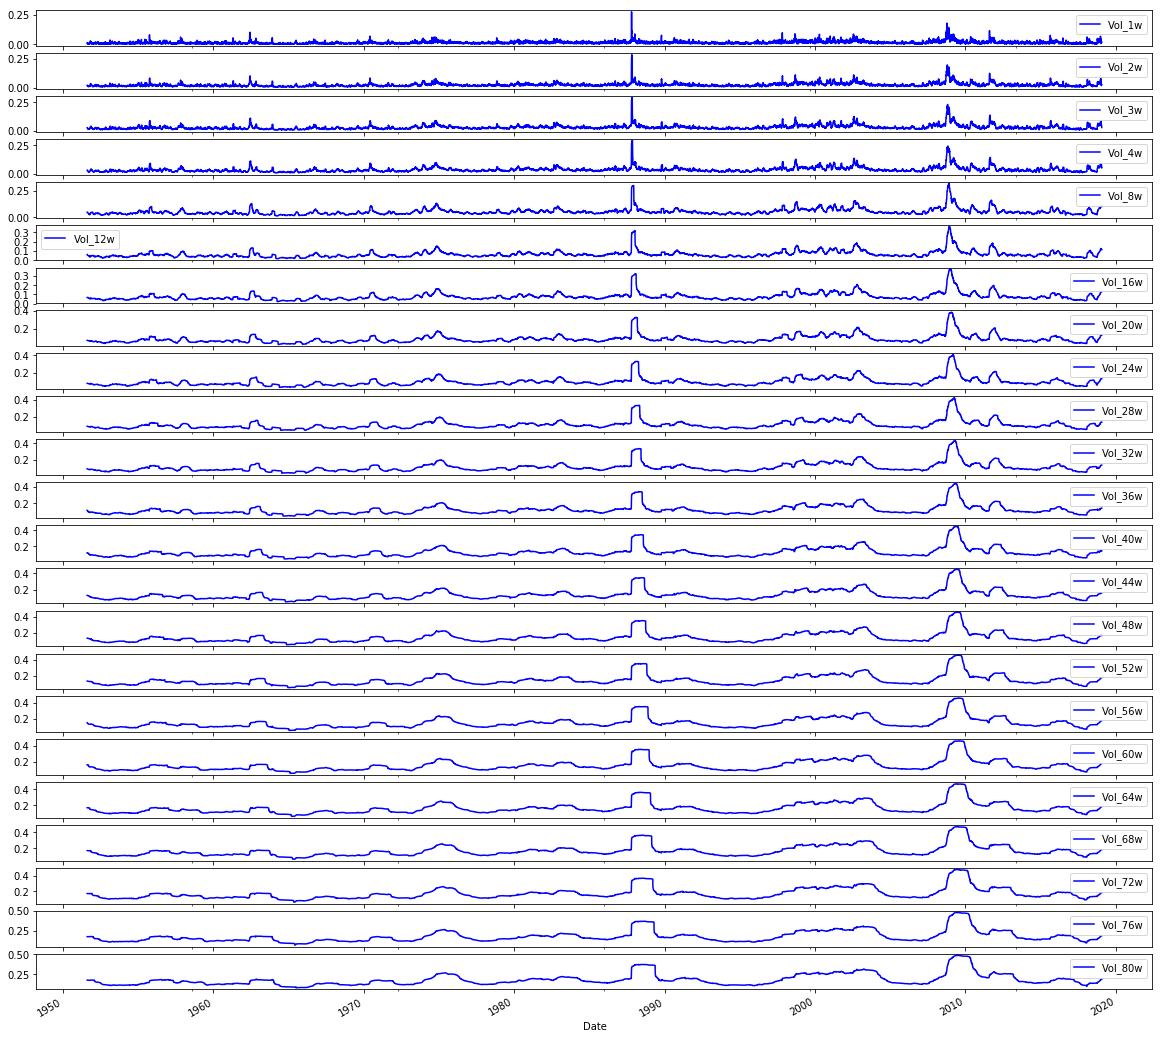

In [6]:
# Plot the Volatilities
sp500.iloc[:,24:47].plot(subplots=True, color='blue',figsize=(20, 20));

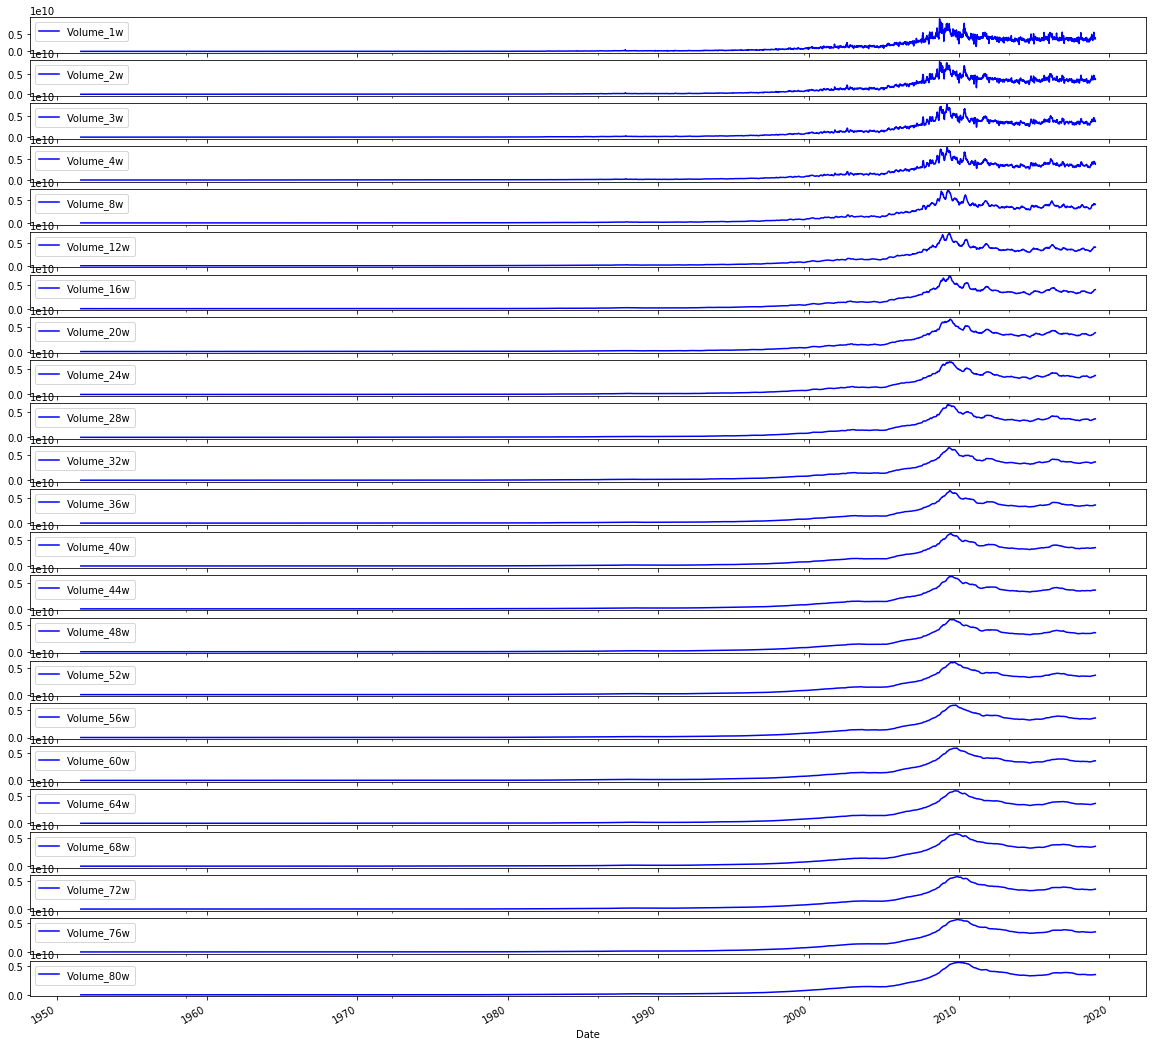

In [7]:
# Plot the Volumes
sp500.iloc[:,47:70].plot(subplots=True, color='blue',figsize=(20, 20));

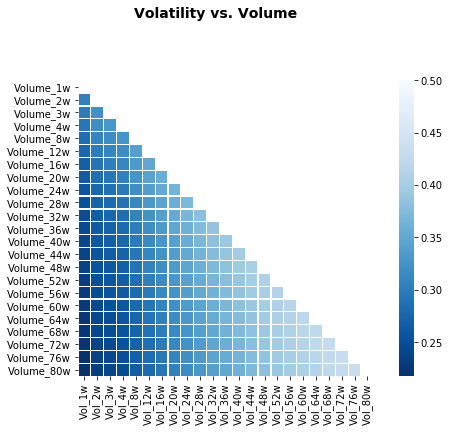

In [8]:
# Plot correlation matrix

focus_cols = sp500.iloc[:,24:47].columns 

corr = sp500.iloc[:,24:70].corr().filter(focus_cols).drop(focus_cols)

mask = np.zeros_like(corr); mask[np.triu_indices_from(mask)] = True # we use mask to plot only part of the matrix

heat_fig, (ax) = plt.subplots(1, 1, figsize=(9,6))

heat = sns.heatmap(corr, 
                   ax=ax, 
                   mask=mask, 
                   vmax=.5, 
                   square=True, 
                   linewidths=.2, 
                   cmap="Blues_r")

heat_fig.subplots_adjust(top=.81)

heat_fig.suptitle('Volatility vs. Volume', fontsize=14, fontweight='bold');

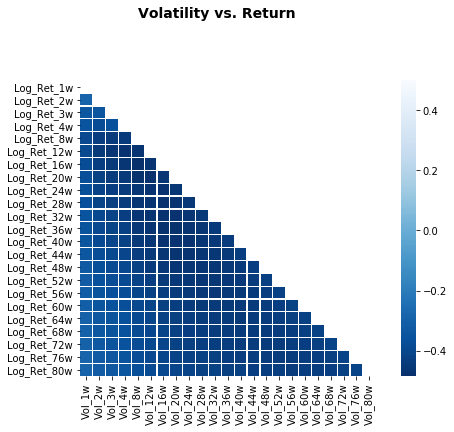

In [9]:
# Plot correlation matrix

focus_cols = sp500.iloc[:,24:47].columns 

corr = sp500.iloc[:,1:47].corr().filter(focus_cols).drop(focus_cols)

mask = np.zeros_like(corr); mask[np.triu_indices_from(mask)] = True # we use mask to plot only part of the matrix

heat_fig, (ax) = plt.subplots(1, 1, figsize=(9,6))

heat = sns.heatmap(corr, 
                   ax=ax, 
                   mask=mask, 
                   vmax=.5, 
                   square=True, 
                   linewidths=.2, 
                   cmap="Blues_r")

heat_fig.subplots_adjust(top=.81)

heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold');

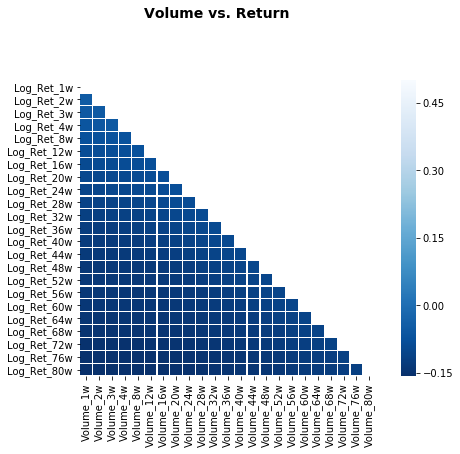

In [10]:
# Plot correlation matrix

focus_cols = sp500.iloc[:,47:70].columns 

corr = sp500.iloc[:, np.r_[1:24, 47:70]].corr().filter(focus_cols).drop(focus_cols)

mask = np.zeros_like(corr); mask[np.triu_indices_from(mask)] = True # we use mask to plot only part of the matrix

heat_fig, (ax) = plt.subplots(1, 1, figsize=(9,6))

heat = sns.heatmap(corr, 
                   ax=ax, 
                   mask=mask, 
                   vmax=.5, 
                   square=True, 
                   linewidths=.2, 
                   cmap="Blues_r")

heat_fig.subplots_adjust(top=.81)

heat_fig.suptitle('Volume vs. Return', fontsize=14, fontweight='bold');

## 2.6 Separate Test Data & Generate Feature Sets 

In [11]:
# Feature Set 1: Volatility
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(sp500.iloc[:,24:47], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 2: Return
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(sp500.iloc[:,1:24], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 3: Volume
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(sp500.iloc[:,47:70], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 4: Volatility and Return
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(sp500.iloc[:,1:47], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 5: Volatility and Volume
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(sp500.iloc[:,24:70], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 6: Return and Volume
X_train_6, X_test_6, y_train_6, y_test_6 =  train_test_split(pd.concat([sp500.iloc[:,1:24], sp500.iloc[:,47:70]], axis=1), sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

# Feature Set 7: Volatility, Return and Volume
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(sp500.iloc[:,1:70], sp500.iloc[:,70], test_size=0.1 ,shuffle = False, stratify = None)

## 2.7 Label Distribution

In [54]:
print("train set increase bias = "+ str(np.mean(y_train_7==1))+"%")

print("test set increase bias = " + str(np.mean(y_test_7==1))+"%")

train set increase bias = 0.6010077874484654%
test set increase bias = 0.6749116607773852%


# 3. Baseline Model

## 3.1 Model Development 

<img src="workflow.png" width="400" />

In [91]:
# Standardized Data
#steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', linear_model.SGDClassifier(random_state=1, tol=1e-3, shuffle=False, early_stopping=False))]

#Normalized Data
steps = [('scaler', MinMaxScaler(feature_range=(0, 1), copy=True)), ('logistic', linear_model.SGDClassifier(random_state=1, tol=1e-3, shuffle=False, early_stopping=False))]

# Using pipeline we glue together the Scaler & the Classifier
# This ensure that during cross validation the Scaler is fitted to only the training folds
pipeline = Pipeline(steps)

# Time Series Split 
dev_size = 0.1
n_splits = int((1//dev_size)-1)   # using // for integer division
tscv = TimeSeriesSplit(n_splits=n_splits) 

# Evaluation Metric
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
metric = 'Accuracy'


# Hyperparameter

# Create loss function
loss = ["log"]

# Number of iterations
iterations = [10] 

# Penalty
penalty = ['l1','l2', 'elasticnet']


# Grid Search

# Regularization  
alpha_g = [0.003] #0.003
l1_ratio_g = [0, 0.2, 0.4, 0.6, 0.8, 1] 

# Create hyperparameter options
hyperparameters_g = {'logistic__alpha':alpha_g, 'logistic__l1_ratio':l1_ratio_g, 'logistic__penalty':penalty, 'logistic__loss':loss, 'logistic__max_iter':iterations}

# Create grid search 
search_g = GridSearchCV(estimator=pipeline, param_grid=hyperparameters_g, cv=tscv, verbose=0, n_jobs=-1, scoring=scoring, refit=metric, return_train_score=True)
# Setting refit='Accuracy', refits an estimator on the whole dataset with the parameter setting that has the best cross-validated Accuracy score.

# Fit grid search
tuned_model = search_g.fit(X_train_7, y_train_7)


# Random Search

# Create regularization hyperparameter distribution using uniform distribution
#alpha_r = uniform(loc=0.001, scale=0.004) 
#l1_ratio_r = uniform(loc=0, scale=1) 

# Create hyperparameter options
#hyperparameters_r = {'logistic__alpha':alpha_r, 'logistic__l1_ratio':l1_ratio_r, 'logistic__penalty':penalty, 'logistic__loss':loss, 'logistic__max_iter':iterations}

# Create randomized search 
#search_r = RandomizedSearchCV(pipeline, hyperparameters_r, random_state=1, cv=tscv, verbose=0, n_jobs=-1, scoring=scoring, refit = metric, return_train_score=True)
# Setting refit='Accuracy', refits an estimator on the whole dataset with the parameter setting that has the best cross-validated Accuracy score.


# Fit randomized search
#tuned_model = search_r.fit(X_train_7, y_train_7)


# View Cost function
print('Loss function:', tuned_model.best_estimator_.get_params()['logistic__loss'])

# View Accuracy 
print(metric +' of the best model: ', tuned_model.best_score_);print("\n")

# View best hyperparameters
print("Best hyperparameters:")
print('Number of iterations:', tuned_model.best_estimator_.get_params()['logistic__max_iter'])
print('Penalty:', tuned_model.best_estimator_.get_params()['logistic__penalty'])
print('Alpha:', tuned_model.best_estimator_.get_params()['logistic__alpha'])
print('l1_ratio:', tuned_model.best_estimator_.get_params()['logistic__l1_ratio'])

Loss function: log
Accuracy of the best model:  0.5356511490866235


Best hyperparameters:
Number of iterations: 10
Penalty: l1
Alpha: 0.003
l1_ratio: 0


## 3.2 Split Time Series 

Time Series cross-validator provides train/dev indices to split time series data samples that are observed at fixed time intervals, in train/dev sets. In each split, dev indices must be higher than before, and thus shuffling in cross validator is inappropriate. The following graph illustrates how the time series split works:


<img src="split.png" width="400" />






## 3.3 Regularization

Regularization adds a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit the noise of the training data and will improve the generalization abilities of the mode


### 3.3.1 L2 Regularization (Ridge penalisation)

The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a_{i}, y_{i}) + \lambda\sum_{i=1}^m\beta_{i}^2\tag{1}$$

The λ parameter is a scalar that should be learned as well, using walk-forward-cross-validation.


The L2 regularization will force the **parameters to be relatively small**, the bigger the penalization, the smaller (and the more robust) the coefficients are.

<img src="ridge.png" width="500" />






### 3.3.2 L1 Regularization (Lasso penalisation)

The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients. 

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a_{i}, y_{i}) + \lambda\sum_{i=1}^m|\beta_{i}|\tag{2}$$

The λ parameter is a scalar that should be learned as well, using walk-forward-cross-validation.

The L1 regularization will **shrink some parameters to zero**. Hence some variables will not play any role in the model, L1 regression can be seen as a way to select features in a model. 


<img src="lasso.png" width="500" />


### 3.3.3 Elastic Net 

Elastic-net is a **mix of both L1 and L2 regularizations**. A penalty is applied to the sum of the absolute values and to the sum of the squared values:

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a_{i}, y_{i}) + \lambda((1-\alpha)\sum_{i=1}^m\beta{i}^2+\alpha\sum_{i=1}^m|\beta_{i}|)\tag{3}$$ 

Lambda is a shared penalization parameter while alpha sets the ratio between L1 and L2 regularization in the Elastic Net Regularization. Hence, we expect a hybrid behavior between L1 and L2 regularization.

Though coefficients are cut, the cut is less abrupt than the cut with lasso penalization alone. 

In [88]:
# Find the number of nonzero coefficients (selected features)
coef = tuned_model.best_estimator_.steps[1][1].coef_[0][:]
total =  len(coef)
select = np.count_nonzero(coef)

print("Total number of features:", total)
print("Number of selected features:", select)

Total number of features: 69
Number of selected features: 11


## 3.4 Evaluate Model  

### 3.4.1 Confusion Matrix



Accuracy: 0.6283863368669023
Precision: 0.6914498141263941
Recall: 0.8115183246073299


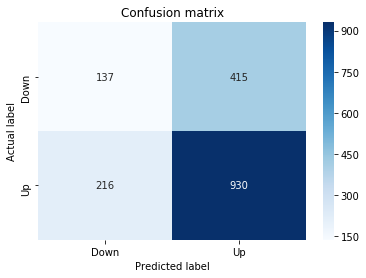

In [89]:
# Make predictions
y_pred_l = tuned_model.predict(X_test_7)


# create confustion matrix
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test_7, y_pred_l)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Down', 'Up']); ax.yaxis.set_ticklabels(['Down', 'Up'])


print("Accuracy:",metrics.accuracy_score(y_test_7, y_pred_l))
print("Precision:",metrics.precision_score(y_test_7, y_pred_l))
print("Recall:",metrics.recall_score(y_test_7, y_pred_l))

### 3.4.2 ROC Curve

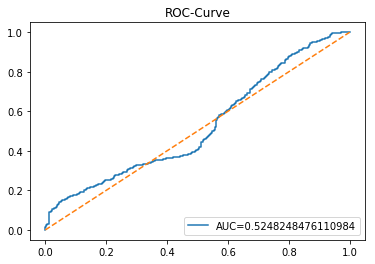

In [90]:
y_pred_proba_l= tuned_model.predict_proba(X_test_7)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_7,  y_pred_proba_l)
auc = metrics.roc_auc_score(y_test_7, y_pred_proba_l)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

# 4. LSTM Models (in process)

## 4.1 Model 1: Volatility



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
X_train_1.shape

In [ ]:
X_train_1.shape[1]

In [ ]:
X_train_1.shape[0]

In [ ]:
X_train_1_lstm = X_train_1.values.reshape(1,X_train_1.shape[0], X_train_1.shape[1])

In [ ]:
y_train_1_lstm = y_train_1.values.reshape(50,)

In [ ]:

## Construct a model with 1 layer of 50 units of LSTM followed by 1 dense layer


epochs = 1
batch_size = 512

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(X_train_1.shape[0], X_train_1.shape[1]))) 
model_1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model_1.summary())


trained_model1 = model1.fit(x=X_train_1_lstm, y=y_train_1, batch_size=batch_size, epochs=epochs, verbose=0) 
                            
                            #validation_split=0.1

In [ ]:
# fix random seed for reproducibility
np.random.seed(1)

# create the model

model_1 = Sequential()
model_1.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_1.summary())
model_1.fit(X_train_1, y_train_1, epochs=3, batch_size=64)

# Final evaluation of the model
scores_1 = model_1.evaluate(X_test_1, y_test_1, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### 4.1.1 Development Model

### 4.1.2 Evaluate Model

#### 4.1.2.1 Confusion Matrix

#### 4.1.2.2 ROC Curve